In [302]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [303]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [304]:
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [305]:
X = train.drop('label', axis=1)
y = train['label']

In [306]:
X.iloc[0].dtype, test.iloc[0].dtype

(dtype('int64'), dtype('int64'))

In [307]:
X /= 255
test /= 255

In [308]:
X.iloc[0].dtype, test.iloc[0].dtype

(dtype('float64'), dtype('float64'))

In [309]:
X = X.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
X.shape, test.shape

((42000, 28, 28, 1), (28000, 28, 28, 1))

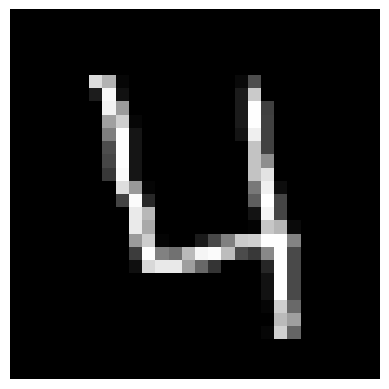

In [310]:
image = X[3]
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

In [311]:
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [312]:
# from tensorflow.keras.utils import to_categorical

# y = to_categorical(y, num_classes=10)
# y

In [313]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)

In [319]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam

model = Sequential([
    Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)),
    Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'),
    MaxPooling2D((2,2)),
    
    Conv2D(64,(3,3),padding='Same', activation='relu'),
    Conv2D(64,(3,3),padding='Same', activation='relu'),
    MaxPooling2D((2,2), strides=(2,2)),

    Conv2D(128,(3,3),padding='Same', activation='relu'),
    Conv2D(128,(3,3),padding='Same', activation='relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    
    Dense(256, 'relu'),
    Dense(128, 'relu'),
    Dense(32, 'relu'),
    Dense(10, 'softmax')
])

In [320]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

In [321]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

data_aug = ImageDataGenerator(
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    )

data_aug.fit(X_train)

In [322]:
reduce_lr = ReduceLROnPlateau(monitor='val_acc', 
                            patience=3, 
                            verbose=1, 
                            factor=0.5, 
                            min_lr=0.00001)

In [323]:
model.fit(data_aug.flow(X_train, y_train, 64),
          epochs=5,
          verbose=1,
          validation_data=(X_test, y_test),
          steps_per_epoch=len(X_train)//64,
          callbacks=[reduce_lr]
          )

Epoch 1/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 131s 243ms/step - accuracy: 0.7235 - loss: 0.7966 - val_accuracy: 0.9780 - val_loss: 0.0743 - learning_rate: 0.0010
Epoch 2/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9780 - val_loss: 0.0743 - learning_rate: 0.0010
Epoch 3/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 128s 244ms/step - accuracy: 0.9711 - loss: 0.0938 - val_accuracy: 0.9808 - val_loss: 0.0659 - learning_rate: 0.0010
Epoch 4/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9808 - val_loss: 0.0659 - learning_rate: 0.0010
Epoch 5/5
525/525 ━━━━━━━━━━━━━━━━━━━━ 131s 249ms/step - accuracy: 0.9775 - loss: 0.0732 - val_accuracy: 0.9874 - val_loss: 0.0412 - learning_rate: 0.0010


In [324]:
predict = model.predict(test)

875/875 ━━━━━━━━━━━━━━━━━━━━ 27s 31ms/step


In [332]:
idxs = [idx for idx,_ in enumerate(test, 1)]

In [335]:
predict = predict.argmax(axis=1)
predict

array([2, 0, 9, ..., 3, 9, 2])

In [336]:
sol = pd.DataFrame({'ImageId':idxs, "Label":predict})
sol.to_csv('submit',index=False)